In [ ]:
#pip install xlrd==1.2.0

In [1]:
#pip install seaborn

In [ ]:
#!python3 -m pip install statsmodels

In [ ]:
#pip install --upgrade pip

#### Bio 539 - CodeBook
#### Samrawit Kebreab Tekie
#### 04/26/2021

In [50]:
"""
LOAD ALL THE NECESSARY PACKAGES 
"""
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
from statsmodels.formula.api import ols

%matplotlib inline

In [22]:
"""
Loading the dataset
"""
Project=pd.read_excel("../BIO539/BIO101_project.xlsx")
Project[:6]

,Code,GENDER,ETHNICITY,FIRST_GEN,HOME_CITY,HOME_STATE,PELL_IND,TD_IND,FERPA_FLG,PRIMARY_PROGRAM,...,CUM_GPA,SAT_SCORE,ACT_SCORE,HS_CONV_GPA,STEM_CRSE_COUNT_TERM,STEM_CRSE_COUNT_TOTAL,Exam One,Diagnostic Exam,First Module,Subject Enhancement Project
0,100,F,2+ Races,Y,Seekonk,MA,N,N,N,UC_PH,...,0.00,1110,0,3.1,3,3,48.0,70,5.0,50
1,101,M,2+ Races,Y,Exeter,RI,Y,N,N,UC_EL,...,0.00,0,0,NaN,1,1,50.0,75,6.0,50
2,102,M,2+ Races,N,Pawtucket,RI,Y,Y,N,UC_AS,...,1.93,0,0,NaN,1,1,13.0,50,0.0,0
3,103,F,2+ Races,Y,Cranston,RI,N,N,N,UC_EL,...,4.00,1140,0,4.1,2,2,92.0,90,12.0,50
4,104,M,2+ Races,N,Holbrook,NY,N,N,N,UC_EL,...,0.00,1020,0,NaN,2,2,40.0,60,0.0,0
5,105,M,2+ Races,Y,East Providence,RI,Y,Y,Y,UC_UN,...,1.71,0,0,NaN,1,6,NaN,0,3.0,0


In [23]:
"""
Data cleaning and renaming of long column heads to make it suitable for calling in future analysis codes
"""
pd.DataFrame(Project)
print (Project.columns)
Project.rename(columns= {'Exam One':'Exam1','Diagnostic Exam ':'DigEx','First Module ':'Mod1'},inplace=True)
print (Project.columns)

Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam One',
       'Diagnostic Exam ', 'First Module ', 'Subject Enhancement Project'],
      dtype='object')
Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam1', 'DigEx',
       'Mod1', 'Subject Enhancement Project'],
      dtype='object')


In [24]:
"""
Dropping NA values from columns 'Exam1' and 'DigEx'
"""
Project.dropna(subset=['Exam1'] + ['DigEx'], inplace=True)

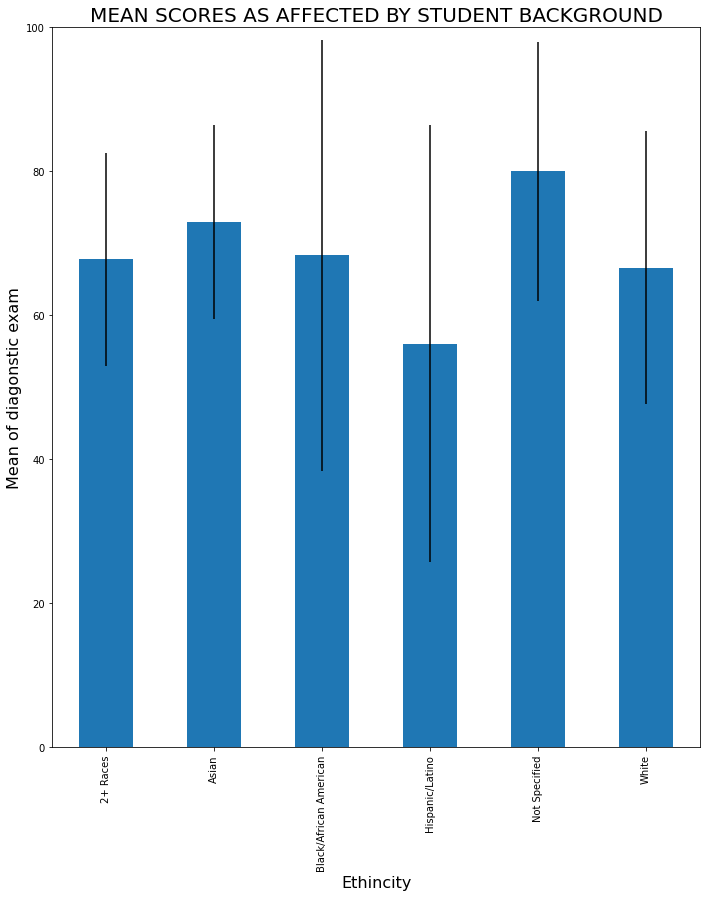

In [101]:
"""
Grouping the dataset by 'Ethnicity' and getting the mean of the groups for the 'DigEx'
"""
DigExMean=Project.groupby('ETHNICITY').agg([np.mean, np.std])['DigEx']
"""
plot the bargraph of the evaluated data.
"""
pdata = pd.DataFrame(DigExMean)
pdata.plot.bar(legend = False, yerr= "std", figsize= (18,20))
plt.ylim(0, 100)
plt.title('MEAN SCORES AS AFFECTED BY STUDENT BACKGROUND', fontsize=20)
plt.xlabel('Ethincity', fontsize=16)
plt.ylabel('Mean of diagonstic exam', fontsize=16)
plt.subplots_adjust(left = 0.3, bottom=0.3, right=0.8, top=0.8)
plt.savefig('Effects of background.png')
plt.show()

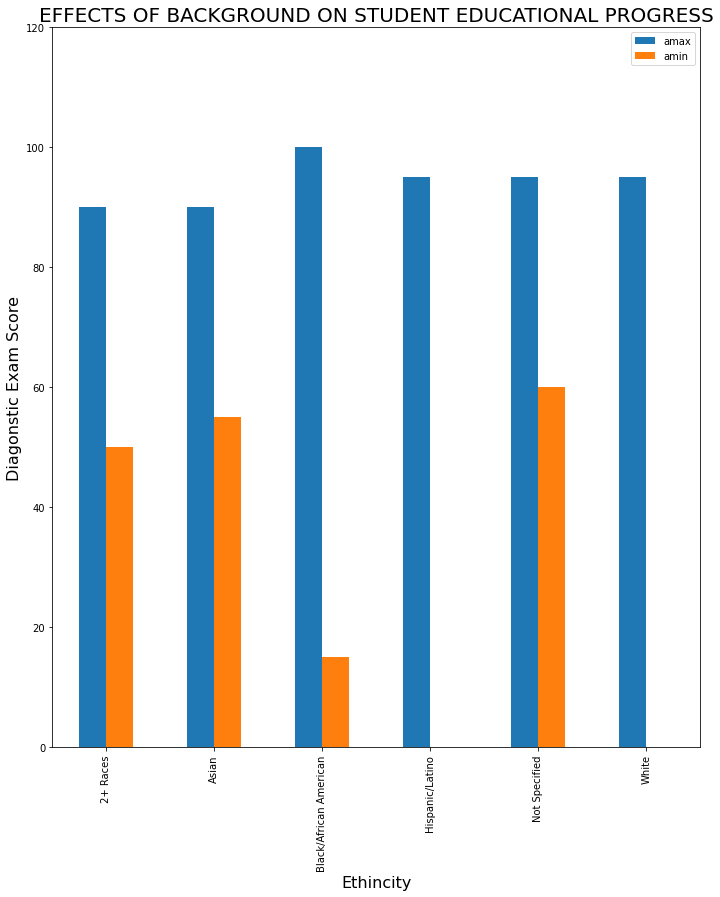

In [102]:
"""
sorting the dataset by ethnicity, connect it with the maximun and minimum values of diagnostic exam results for each group.
"""
DigExMaxMin=Project.groupby('ETHNICITY').agg([np.max, np.min])['DigEx']
"""
plot the bargraph of the evaluated data.
"""
pdata = pd.DataFrame(DigExMaxMin)
pdata.plot.bar(legend = True, figsize= (18,20))
plt.ylim(0, 120)
plt.title('EFFECTS OF BACKGROUND ON STUDENT EDUCATIONAL PROGRESS',fontsize=20)
plt.xlabel('Ethincity', fontsize=16)
plt.ylabel('Diagonstic Exam Score', fontsize=16)
plt.subplots_adjust(left = 0.3, bottom=0.3, right=0.8, top=0.8)
plt.savefig('Effects of background on Exam.png')
plt.show()

In [27]:
"""
Setting a linear regression analysis to describe the results of exam one through the effects of Diagnostic exam, gender and
first generation. Here a formula approach from the stats models is used, which uses C() to indicate a categorical variables.
The formula assigns a dummy value to a categorical variable and uses it in the regression. 
This code was adopted from https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
and modified to fit this project.
"""
lm = ols('DigEx ~ C(GENDER) + C(FIRST_GEN)', data=Project)
lm1= lm.fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DigEx   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.03786
Date:                Mon, 26 Apr 2021   Prob (F-statistic):              0.963
Time:                        15:48:25   Log-Likelihood:                -499.32
No. Observations:                 112   AIC:                             1005.
Df Residuals:                     109   BIC:                             1013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.5803      3.312     19.798      0.000      59.015      72.145
C(GENDER)[T.M]        0.4924      4.239      0.116      0.908      -7.908       8.893
C(FIRST_GEN)[T.Y]     1.1839      4.352      0.272      0.786      -7.441       9.809
==============================================================================
Omnibus:                       24.762   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.601
Skew:                          -1.137   Prob(JB):                     5.05e-08
Kurtosis:                       4.425   Cond. No.                         3.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
"""
Printing the p-values of the above regression analysis
"""
print(lm1.pvalues)

Intercept            6.833949e-38
C(GENDER)[T.M]       9.077231e-01
C(FIRST_GEN)[T.Y]    7.860944e-01
dtype: float64


In [39]:
"""
Setting a linear regression analysis to describe the results of exam one through the effects of Diagnostic exam, gender and
first generation. Here a formula approach from the stats models is used, which uses C() to indicate a categorical variables.
This code was adopted from https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
and modified to fit this project.
"""
lm2 = ols('Exam1 ~ Mod1 + C(GENDER)+ C(ETHNICITY) + C(FIRST_GEN)', data=Project)
lm3= lm2.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Exam1   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.350
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0231
Time:                        15:50:28   Log-Likelihood:                -490.08
No. Observations:                 112   AIC:                             998.2
Df Residuals:                     103   BIC:                             1023.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 43.2308      8.207      5.268      0.000      26.954      59.508
C(GENDER)[T.M]                            -0.9121      4.039     -0.226      0.822      -8.923       7.099
C(ETHNICITY)[T.Asian]                      8.8075     11.621      0.758      0.450     -14.239      31.854
C(ETHNICITY)[T.Black/African American]     6.9772     10.576      0.660      0.511     -13.997      27.952
C(ETHNICITY)[T.Hispanic/Latino]            6.6422      8.642      0.769      0.444     -10.497      23.781
C(ETHNICITY)[T.Not Specified]             26.1646     15.991      1.636      0.105      -5.550      57.879
C(ETHNICITY)[T.White]                     12.1658      7.292      1.668      0.098      -2.297      26.628
C(FIRST_GEN)[T.Y]                          2.2839      4.497      0.508      0.613      -6.635      11.203
Mod1                                       1.6061      0.513      3.129      0.002       0.588       2.624
==============================================================================
Omnibus:                       11.418   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.806
Skew:                          -0.765   Prob(JB):                      0.00273
Kurtosis:                       3.437   Cond. No.                         92.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
"""
printing p-values of the regression model
"""
print(lm3.pvalues)

Intercept                                 7.616668e-07
C(GENDER)[T.M]                            8.217939e-01
C(ETHNICITY)[T.Asian]                     4.502284e-01
C(ETHNICITY)[T.Black/African American]    5.108928e-01
C(ETHNICITY)[T.Hispanic/Latino]           4.438783e-01
C(ETHNICITY)[T.Not Specified]             1.048524e-01
C(ETHNICITY)[T.White]                     9.829024e-02
C(FIRST_GEN)[T.Y]                         6.126527e-01
Mod1                                      2.280686e-03
dtype: float64


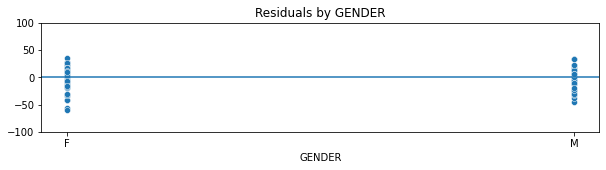

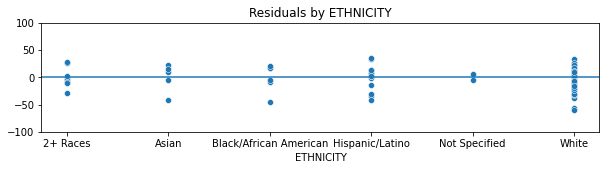

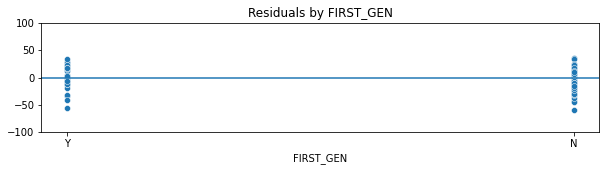

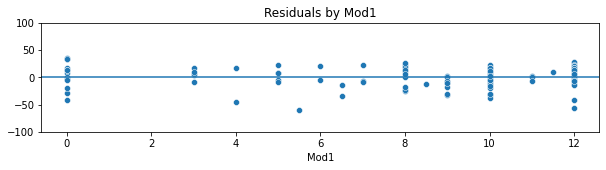

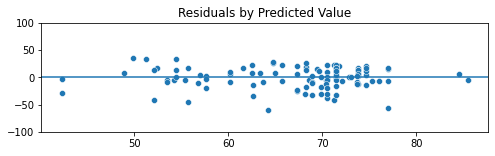

2.7343207063625283e-14


In [41]:
"""
Using the residual test to measure the robustness (errors) of the prediction made using the linear regression
testing residual by each predictor variable used in the regression analysis
"""
for x in ('GENDER', 'ETHNICITY', 'FIRST_GEN','Mod1'):
    plt.figure(figsize=(10,2))
    sns.scatterplot(Project[x], lm3.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
  
    plt.axhline(np.mean(lm3.resid))
    plt.show()
"""
testing residual of the predicted value
"""
plt.figure(figsize=(8,2))
sns.scatterplot(lm3.predict(), lm3.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm3.resid))
plt.show()
"""
printing the mean of the residual
"""
print(np.mean(lm3.resid))
warnings.simplefilter(action='ignore', category=FutureWarning)

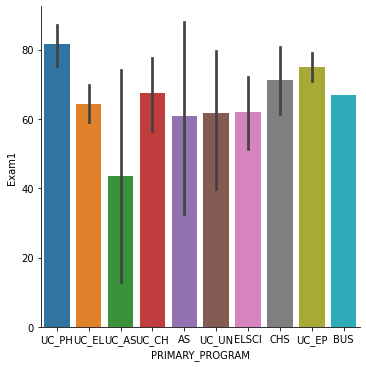

<Figure size 1152x576 with 0 Axes>

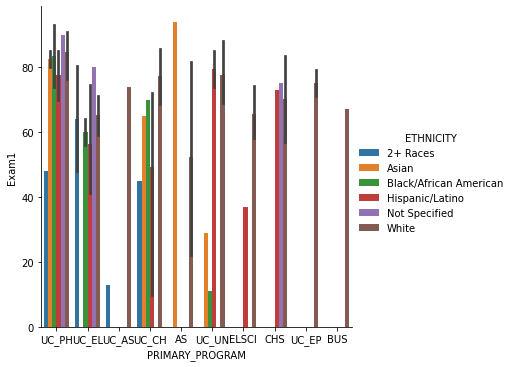

In [42]:
"""
Plotting Exam1 against Primary program to see if there is a significant difference between students of different programs
"""
sns.catplot('PRIMARY_PROGRAM', 'Exam1', data=Project, kind='bar')
plt.figure(figsize=(16,8))
plt.show()
"""
adding other predictos ethnicity and first generation to the plot above to show how background influences the Exam1 results
"""
sns.catplot('PRIMARY_PROGRAM', 'Exam1', hue='ETHNICITY', data=Project, kind='bar')
plt.show
warnings.simplefilter(action='ignore', category=FutureWarning)

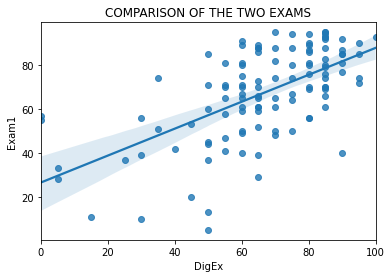

In [96]:
"""
plotting Exam1 against DigEx to see if the two values have a pattern and 
fitting a regression line to the scatter plot to test correlation
"""
ax = sns.regplot('DigEx', 'Exam1', data=Project).set_title('COMPARISON OF THE TWO EXAMS')
plt.show()
fig=ax.get_figure()
fig.savefig('compare.png')
warnings.simplefilter(action='ignore', category=FutureWarning)


In [44]:
"""

#independent t-test to test if the two fields Exam1 and DigEx results are statistically different from one another.
"""
tstat, pval = stats.ttest_ind(Project.Exam1, Project.DigEx)
"""
#printing the p-value of the t-test
"""
print(pval)

0.7244408665866546


In [35]:
"""
linear regression model to describe Exam1 by DigEx as a predictor
"""
lm4 = ols('Exam1 ~ DigEx', data=Project)
lm5= lm4.fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Exam1   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     66.61
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           5.69e-13
Time:                        15:48:37   Log-Likelihood:                -476.94
No. Observations:                 113   AIC:                             957.9
Df Residuals:                     111   BIC:                             963.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5742      5.210      5.101      0.000      16.251      36.898
DigEx          0.6131      0.075      8.161      0.000       0.464       0.762
==============================================================================
Omnibus:                        7.977   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.637
Skew:                          -0.605   Prob(JB):                       0.0220
Kurtosis:                       3.396   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
"""
printing the p-values of the regression for closer look
"""
print(lm5.pvalues)

Intercept    1.406149e-06
DigEx        5.692343e-13
dtype: float64
